In [105]:
print('Hello')

Hello


In [106]:
import pandas as pd # основная библиотека для анализа данных: https://pandas.pydata.org/docs/getting_started/index.html#getting-started
import seaborn as sns # дополнительная библиотека для визуализации данных: https://seaborn.pydata.org/

**Задача:** создать модель машинного обучения для предсказания выживаемости пассажиров на Титанике

Данные доступны по ссылке: https://drive.google.com/file/d/1Y2iUJ1MX20Nnpyvo86f0br2LnhNbiCQi/view?usp=drive_link

### **Загрузка данных**

In [107]:
df = pd.read_csv('/Users/maximdemekhin/Downloads/ML/Titanic/titanic.csv')
df.head() # выводим 5 первых строчек

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


Обычно все данные хранятся в формате csv (comma separated values), т.е. значения признаков разделены между собой запятыми. Но бывает и так, что они разделены не запятыми, а символом табуляции. Тогда в функцию чтения данных следует передать еще 1 параметр: `pd.read_csv('titanic.csv', sep='\t')`. Какие-либо другие разделители встречаются КРАЙНЕ редко

In [108]:
df.head(2) # если нужно не 5, а только 2

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C


In [109]:
df.tail() # выводим 5 последних строк

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


In [110]:
df # выводим весь датасет

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.00,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.00,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.00,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.00,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.00,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.00,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.00,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.00,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.00,1,0,237736,30.0708,NaN,C


У нас датасет довольно большой, поэтому pandas его обрезает. Как это можно поправить?

In [111]:
pd.set_option('display.max_rows', 1000) # показывать 1000 строк
pd.set_option('display.max_columns', 50) # показывать 50 колонок

In [112]:
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.00,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.00,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.00,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.00,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.00,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.00,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.00,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.00,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.00,1,0,237736,30.0708,NaN,C


In [113]:
df.shape # количество строк и столбцов

(891, 12)

In [114]:
df.info() # сводная таблица с информацией о данных

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [115]:
df.describe() # описательные статистики для численных значений

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [116]:
df_copied = df.copy() # копируем наш датасет

❗❗**Attention**. Копию датасета создаем обязательно: в процессе работы с данными мы случайно можем внести ряд нежелательных изменений, отменить которые будет проблематично. Входные данные, в свою очередь, обычно имеют большой размер, и их повторная может отнять много времени. В таких случаях копия выручает

**Удаление дупликатов**

В данных могут содержаться дупликаты - строки, в которых значения по всем столбцам совпадают. От дупликатов тоже нужно избавляться, т.к. они искажают реальную картину обучения (результаты будут казаться лучше, чем они есть на самом деле☝)

In [117]:
"""ID обычно проставляется автоматически, в нем всегда уникальные значения,
   поэтому имеет смысл удалить его перед поиском дупликатов"""

del df['PassengerId']

In [118]:
print(df.duplicated().sum())

0


In [119]:
df.shape

(891, 11)

In [120]:
df.drop_duplicates(inplace=True) # не забываем про inplace = True, иначе ничего не удалится
df.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [121]:
df.shape

(891, 11)

**Доступ к данным**

In [122]:
list(df.columns) # выводим все столбцы

['Survived',
 'Pclass',
 'Name',
 'Sex',
 'Age',
 'SibSp',
 'Parch',
 'Ticket',
 'Fare',
 'Cabin',
 'Embarked']

Для дальнейших действий лучше преобразовать это в обычный список:

In [123]:
columns = list(df.columns)
columns

['Survived',
 'Pclass',
 'Name',
 'Sex',
 'Age',
 'SibSp',
 'Parch',
 'Ticket',
 'Fare',
 'Cabin',
 'Embarked']

In [124]:
df['Age'] # обращаемся к столбцу Age, универсальный способ обращения

0      22.00
1      38.00
2      26.00
3      35.00
4      35.00
5        NaN
6      54.00
7       2.00
8      27.00
9      14.00
10      4.00
11     58.00
12     20.00
13     39.00
14     14.00
15     55.00
16      2.00
17       NaN
18     31.00
19       NaN
20     35.00
21     34.00
22     15.00
23     28.00
24      8.00
25     38.00
26       NaN
27     19.00
28       NaN
29       NaN
30     40.00
31       NaN
32       NaN
33     66.00
34     28.00
35     42.00
36       NaN
37     21.00
38     18.00
39     14.00
40     40.00
41     27.00
42       NaN
43      3.00
44     19.00
45       NaN
46       NaN
47       NaN
48       NaN
49     18.00
50      7.00
51     21.00
52     49.00
53     29.00
54     65.00
55       NaN
56     21.00
57     28.50
58      5.00
59     11.00
60     22.00
61     38.00
62     45.00
63      4.00
64       NaN
65       NaN
66     29.00
67     19.00
68     17.00
69     26.00
70     32.00
71     16.00
72     21.00
73     26.00
74     32.00
75     25.00
76       NaN

In [125]:
df.Age # другой вариант обратиться к столбцу; не годится, если в названии столбца есть пробелы, точки, запятые и т.п.

0      22.00
1      38.00
2      26.00
3      35.00
4      35.00
5        NaN
6      54.00
7       2.00
8      27.00
9      14.00
10      4.00
11     58.00
12     20.00
13     39.00
14     14.00
15     55.00
16      2.00
17       NaN
18     31.00
19       NaN
20     35.00
21     34.00
22     15.00
23     28.00
24      8.00
25     38.00
26       NaN
27     19.00
28       NaN
29       NaN
30     40.00
31       NaN
32       NaN
33     66.00
34     28.00
35     42.00
36       NaN
37     21.00
38     18.00
39     14.00
40     40.00
41     27.00
42       NaN
43      3.00
44     19.00
45       NaN
46       NaN
47       NaN
48       NaN
49     18.00
50      7.00
51     21.00
52     49.00
53     29.00
54     65.00
55       NaN
56     21.00
57     28.50
58      5.00
59     11.00
60     22.00
61     38.00
62     45.00
63      4.00
64       NaN
65       NaN
66     29.00
67     19.00
68     17.00
69     26.00
70     32.00
71     16.00
72     21.00
73     26.00
74     32.00
75     25.00
76       NaN

In [126]:
df.iloc[0] # обращаемся к 1-ой строке

Survived                          0
Pclass                            3
Name        Braund, Mr. Owen Harris
Sex                            male
Age                            22.0
SibSp                             1
Parch                             0
Ticket                    A/5 21171
Fare                           7.25
Cabin                           NaN
Embarked                          S
Name: 0, dtype: object

In [127]:
df.iloc[0]['Age'] # обращаемся к значению столбца Age первой строки

np.float64(22.0)

In [128]:
for i, row in df.iterrows(): # итерируемся по строкам датасета
  print(f"{i}: {row['Age']}") # для каждой строки печатаем возраст

0: 22.0
1: 38.0
2: 26.0
3: 35.0
4: 35.0
5: nan
6: 54.0
7: 2.0
8: 27.0
9: 14.0
10: 4.0
11: 58.0
12: 20.0
13: 39.0
14: 14.0
15: 55.0
16: 2.0
17: nan
18: 31.0
19: nan
20: 35.0
21: 34.0
22: 15.0
23: 28.0
24: 8.0
25: 38.0
26: nan
27: 19.0
28: nan
29: nan
30: 40.0
31: nan
32: nan
33: 66.0
34: 28.0
35: 42.0
36: nan
37: 21.0
38: 18.0
39: 14.0
40: 40.0
41: 27.0
42: nan
43: 3.0
44: 19.0
45: nan
46: nan
47: nan
48: nan
49: 18.0
50: 7.0
51: 21.0
52: 49.0
53: 29.0
54: 65.0
55: nan
56: 21.0
57: 28.5
58: 5.0
59: 11.0
60: 22.0
61: 38.0
62: 45.0
63: 4.0
64: nan
65: nan
66: 29.0
67: 19.0
68: 17.0
69: 26.0
70: 32.0
71: 16.0
72: 21.0
73: 26.0
74: 32.0
75: 25.0
76: nan
77: nan
78: 0.83
79: 30.0
80: 22.0
81: 29.0
82: nan
83: 28.0
84: 17.0
85: 33.0
86: 16.0
87: nan
88: 23.0
89: 24.0
90: 29.0
91: 20.0
92: 46.0
93: 26.0
94: 59.0
95: nan
96: 71.0
97: 23.0
98: 34.0
99: 34.0
100: 28.0
101: nan
102: 21.0
103: 33.0
104: 37.0
105: 28.0
106: 21.0
107: nan
108: 38.0
109: nan
110: 47.0
111: 14.5
112: 22.0
113: 20.0
114

In [129]:
age_survived = df[['Age', 'Survived']] # вырезаем из датасета нужный нам кусок
age_survived.head()

,Age,Survived
0,22.0,0
1,38.0,1
2,26.0,1
3,35.0,1
4,35.0,0


Можно посмотреть, какие значения принимает тот или иной признак:

In [130]:
df['Survived'].value_counts()

Survived
0    549
1    342
Name: count, dtype: int64

И сколько есть различных уникальных значений:

In [131]:
df['Survived'].nunique()

2

Можно посчитать различные статистические характеристики:

In [132]:
print(f"Средний возраст: {df['Age'].mean()}")
print(f"Медианный возраст: {df['Age'].median()}")
print(f"Самое частое значение (мода) возраста: {df['Age'].mode()[0]}")
print(f"Минимальный возраст: {df['Age'].min()}")
print(f"Максимальный возраст: {df['Age'].max()}")
print(f"Стандартное отклонение: {df['Age'].std()}")
print(f"Сумма возрастов всех пассажиров: {df['Age'].sum()}")


Средний возраст: 29.69911764705882
Медианный возраст: 28.0
Самое частое значение (мода) возраста: 24.0
Минимальный возраст: 0.42
Максимальный возраст: 80.0
Стандартное отклонение: 14.526497332334044
Сумма возрастов всех пассажиров: 21205.17


**Удаление данных**

В данных могут быть столбцы, которые не несут в себе никакой полезной информации и не являтся релевантными для предсказания целевой переменной (например, *Ticket*, в нашем случае). Удалим их:

In [133]:
del df['Ticket']
df.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
0,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,7.2500,NaN,S
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,71.2833,C85,C
2,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,7.9250,NaN,S
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,53.1000,C123,S
4,0,3,"Allen, Mr. William Henry",male,35.0,0,0,8.0500,NaN,S


Если хотим удалить сразу несколько, это можно сделать элегантнее:

In [134]:
cols_to_del = ['Name', 'Cabin']
df.drop(labels=cols_to_del, axis=1) # axis отвечает за ось удаления (0 - строка, 1 - столбец)

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.00,1,0,7.2500,S
1,1,1,female,38.00,1,0,71.2833,C
2,1,3,female,26.00,0,0,7.9250,S
3,1,1,female,35.00,1,0,53.1000,S
4,0,3,male,35.00,0,0,8.0500,S
5,0,3,male,NaN,0,0,8.4583,Q
6,0,1,male,54.00,0,0,51.8625,S
7,0,3,male,2.00,3,1,21.0750,S
8,1,3,female,27.00,0,2,11.1333,S
9,1,2,female,14.00,1,0,30.0708,C


❗❗**Attention**. Но если мы сейчас снова посмотрим на датасет, то увидим, что нужные столбцы не удалились:

In [135]:
df.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
0,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,7.2500,NaN,S
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,71.2833,C85,C
2,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,7.9250,NaN,S
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,53.1000,C123,S
4,0,3,"Allen, Mr. William Henry",male,35.0,0,0,8.0500,NaN,S


Чтобы избежать этого эффекта, зададим параметр `inplace=True`:

In [136]:
df.drop(labels=cols_to_del, axis=1, inplace=True)
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


Можно также удалять строки, обращаясь к их численному номеру:

In [137]:
df.drop(labels=[0, 2], axis=0, inplace=True) # удалили 1-ую и 3-ю строку
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
1,1,1,female,38.0,1,0,71.2833,C
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S
5,0,3,male,NaN,0,0,8.4583,Q
6,0,1,male,54.0,0,0,51.8625,S


### **Работа с пропусками**

Проверим оставшиеся данные на наличие пропусков:

In [138]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 889 entries, 1 to 890
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  889 non-null    int64  
 1   Pclass    889 non-null    int64  
 2   Sex       889 non-null    object 
 3   Age       712 non-null    float64
 4   SibSp     889 non-null    int64  
 5   Parch     889 non-null    int64  
 6   Fare      889 non-null    float64
 7   Embarked  887 non-null    object 
dtypes: float64(2), int64(4), object(2)
memory usage: 62.5+ KB


❓**Что лучше: среднее или медиана?**

Медиана более устойчива к аномалиям в данных по сравнению со средним, поэтому пропуски рекомендуется заполнять медианным значением. Пример:
пусть у нас есть выборка 1, 2, 3, 1000, 5. Мы понимаем, что 1000 - это, скорее всего, аномалия, некая ошибка в данных. Среднее значение в выборке будет 202.2, что довольно плохо приближает реальную картину. А вот медианное значение будет 3, и это уже гораздо лучше

Заполним пропуски в столбце *Age*:

In [139]:
df['Age'] = df['Age'].fillna(df['Age'].median()) # функция fillna заполняет пропуски
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
1,1,1,female,38.0,1,0,71.2833,C
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S
5,0,3,male,28.0,0,0,8.4583,Q
6,0,1,male,54.0,0,0,51.8625,S


❗❗**Attention**. Модели машинного обучения не умеют работать с пропусками, поэтому от них нужно обязательно избавляться. Вариантов несколько:


1.   Если пропусков в столбце много (+- половина и больше), удаляем столбец
2.   Если пропусков совсем мало (менее 1%), можем удалить строки, содержащие пропуски (но так лучше не делать, стараемся удалять строки лишь в том случае, когда для строки в большей части столбцов стоят NaN)
3.   Либо можем попытаться заполнить пропуски какими-либо значениями. Наиболее популярные варианты: среднее, медиана или мода по столбцу. Первые среднее и медиана используются в случае количественных признаков, мода - в случае категориальных




In [140]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 889 entries, 1 to 890
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  889 non-null    int64  
 1   Pclass    889 non-null    int64  
 2   Sex       889 non-null    object 
 3   Age       889 non-null    float64
 4   SibSp     889 non-null    int64  
 5   Parch     889 non-null    int64  
 6   Fare      889 non-null    float64
 7   Embarked  887 non-null    object 
dtypes: float64(2), int64(4), object(2)
memory usage: 62.5+ KB


### **Создание новых признаков**

Бывает так, что нам хотелось бы создать какой-то новый признак на основе уже существующих, чтобы улучшить качество обучения. Например, давайте определим возрастную категорию на основе возраста: дети, молодые, люди средних лет и пассажиры преклонного возраста:

In [141]:
def get_age_category(age): # задаем преобразующую функцию
  if age < 18:
    return 'Child'
  if age < 40:
    return 'Young'
  if age < 60:
    return 'Middle-aged'
  else:
    return 'Old'

In [142]:
df['Age_category'] = df['Age'].apply(get_age_category) # применяем функцию к столбцу Age и записываем результат в Age_category
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Age_category
1,1,1,female,38.0,1,0,71.2833,C,Young
3,1,1,female,35.0,1,0,53.1000,S,Young
4,0,3,male,35.0,0,0,8.0500,S,Young
5,0,3,male,28.0,0,0,8.4583,Q,Young
6,0,1,male,54.0,0,0,51.8625,S,Middle-aged


### **Визуализация данных**

❗❗**Attention**. Графики позволяют гораздо лучше воспринимать информацию, поэтому активно используйте их в своей работе

In [143]:
sns.set_theme()

**Линейный график** - подходит для отображения изменений переменной с течением времени (погода в разные месяцы), а также для отображения зависимости одной переменной от другой (https://seaborn.pydata.org/generated/seaborn.lineplot.html). Посмотрим, как количество членов семьи влияет на выживаемость

<Axes: xlabel='Family_size', ylabel='Survived'>

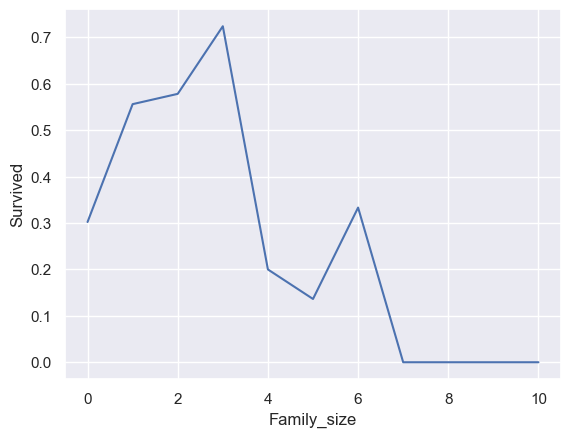

In [144]:
df['Family_size'] = df['SibSp'] + df['Parch']
family_survival = (df.groupby('Family_size')['Survived'].mean()) # группируем по
sns.lineplot(family_survival)

Но чаще для отображения зависимости одной переменной от другой используется другой график - **график рассеяния**, он же **scatter plot** (https://seaborn.pydata.org/generated/seaborn.scatterplot.html)

<Axes: xlabel='Family_size', ylabel='Survived'>

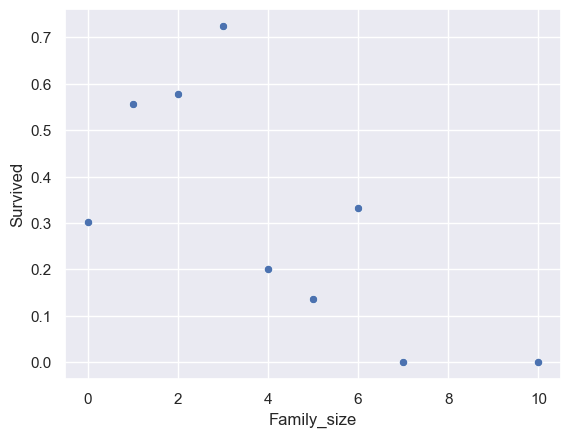

In [145]:
sns.scatterplot(family_survival)

**Гистограмма** - используется для отображения распределения какого-то признака (https://seaborn.pydata.org/generated/seaborn.histplot.html)

<Axes: xlabel='Age', ylabel='Count'>

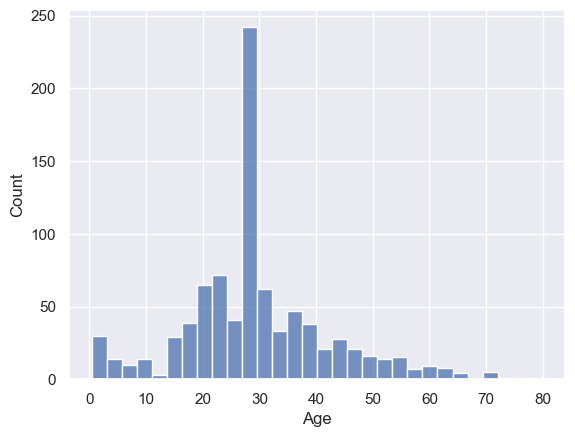

In [146]:
sns.histplot(df['Age'])

Можем вывести функцию распределения, установив параметр `kde=True`. Видим, что получишвшийся график похож на нормальное распределение (https://thecode.media/gauss/)

<Axes: xlabel='Age', ylabel='Count'>

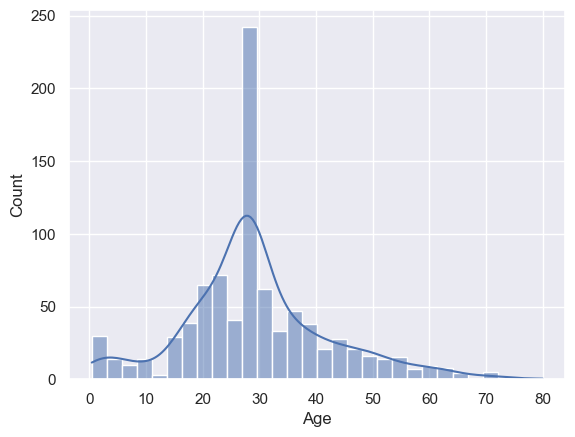

In [147]:
sns.histplot(df['Age'], kde=True)

**Столбчатая гистограмма (bar plot)** - используется, когда у нас признак разбит на категории, и мы хотим посчитать какую-то статистику по каждой из категорий (https://seaborn.pydata.org/generated/seaborn.barplot.html). Посмотрим на долю выживших пассажиров в каждой из категорий:

<Axes: xlabel='Age_category', ylabel='Survived'>

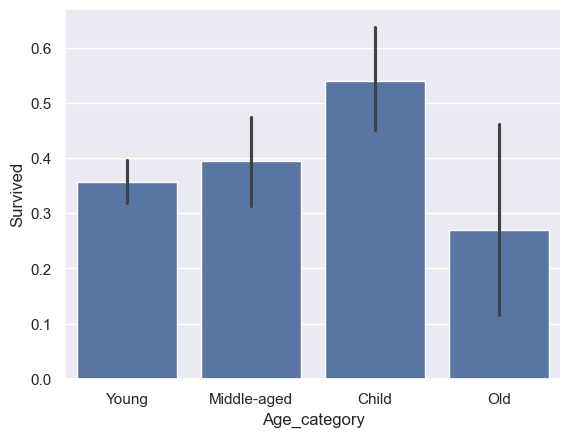

In [148]:
sns.barplot(data=df, x=df['Age_category'], y=df['Survived'])

### **Поиск выбросов (на примере признака *Age*)**

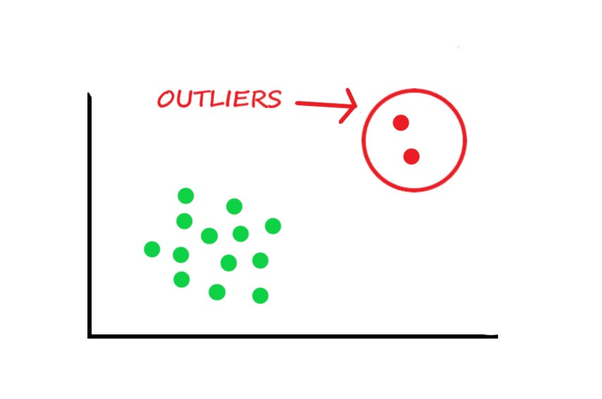

Самый способ искать выбросы - на глаз. Можно просмотреть датасет глазами на предмет наличия очень странных значений или, например, вызвать функцию `value_counts()` (последнее плохо работает в случае большого количества уникальных значений)

In [149]:
df['Age'].value_counts()

Age
28.00    202
24.00     30
22.00     26
18.00     26
30.00     25
19.00     25
21.00     24
25.00     23
36.00     22
29.00     20
35.00     18
27.00     18
32.00     18
16.00     17
26.00     17
31.00     17
34.00     15
20.00     15
33.00     15
23.00     15
39.00     14
40.00     13
42.00     13
17.00     13
45.00     12
38.00     11
4.00      10
50.00     10
2.00      10
44.00      9
48.00      9
47.00      9
54.00      8
9.00       8
1.00       7
51.00      7
37.00      6
52.00      6
14.00      6
41.00      6
3.00       6
49.00      6
58.00      5
15.00      5
43.00      5
5.00       4
11.00      4
56.00      4
62.00      4
60.00      4
8.00       4
6.00       3
7.00       3
61.00      3
46.00      3
65.00      3
10.00      2
30.50      2
64.00      2
13.00      2
63.00      2
70.00      2
57.00      2
0.75       2
71.00      2
59.00      2
0.83       2
40.50      2
55.00      2
32.50      2
28.50      2
45.50      2
34.50      1
0.42       1
0.67       1
66.00      1
24.50   

Другой вариант - построить "ящик с усами", он же boxplot (https://seaborn.pydata.org/generated/seaborn.boxplot.html). Те значения, которые лежат за пределами усов, считаются выбросами и помечаются черными точками

<Axes: xlabel='Age'>

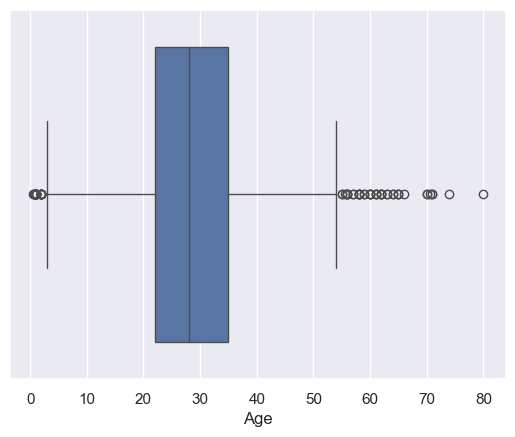

In [150]:
sns.boxplot(x=df['Age'])

Третий подход - считать выбросами те значения, которые отстоят от среднего более чем на 3 стандартных отклонения (по модулю).

In [151]:
df['Age'].describe()

count    889.000000
mean      29.373645
std       13.031515
min        0.420000
25%       22.000000
50%       28.000000
75%       35.000000
max       80.000000
Name: Age, dtype: float64

In [152]:
age_mean = 29.373645
age_std = 13.031515

In [153]:
upper_bound = age_mean + 3 * age_std
lower_bound = age_mean - 3 * age_std

print(upper_bound)
print(lower_bound)

68.46819
-9.720900000000004


❗❗**Attention**. Нашли выбросы, что делать дальше? Первым делом мы должны ответить на вопрос, действительно ли найденные выбросы являются аномалиями: статистические алгоритмы далеко не всегда выдают хорошее приближение. Например, в случае возраста значения 68, 80 и 0.9 - вполне себе реальные и интерпретируемые, поэтому с ними ничего не делаем. Если же мы понимаем, что перед нами действительно аномалия, то варианта 2: либо удаляем нужную строчку из набора данных, либо заменяем значение из логических соображений

### **Тепловая карта и матрицы корреляций**

Из всех пар признаков, у которых взаимная корреляция больше 0.9, необходимо оставить один - тот, у которого выше корреляция с целевой переменной (столбец `Survived` в нашем случае). Это необходимо для того, чтобы предотвратить возможность переобучения:

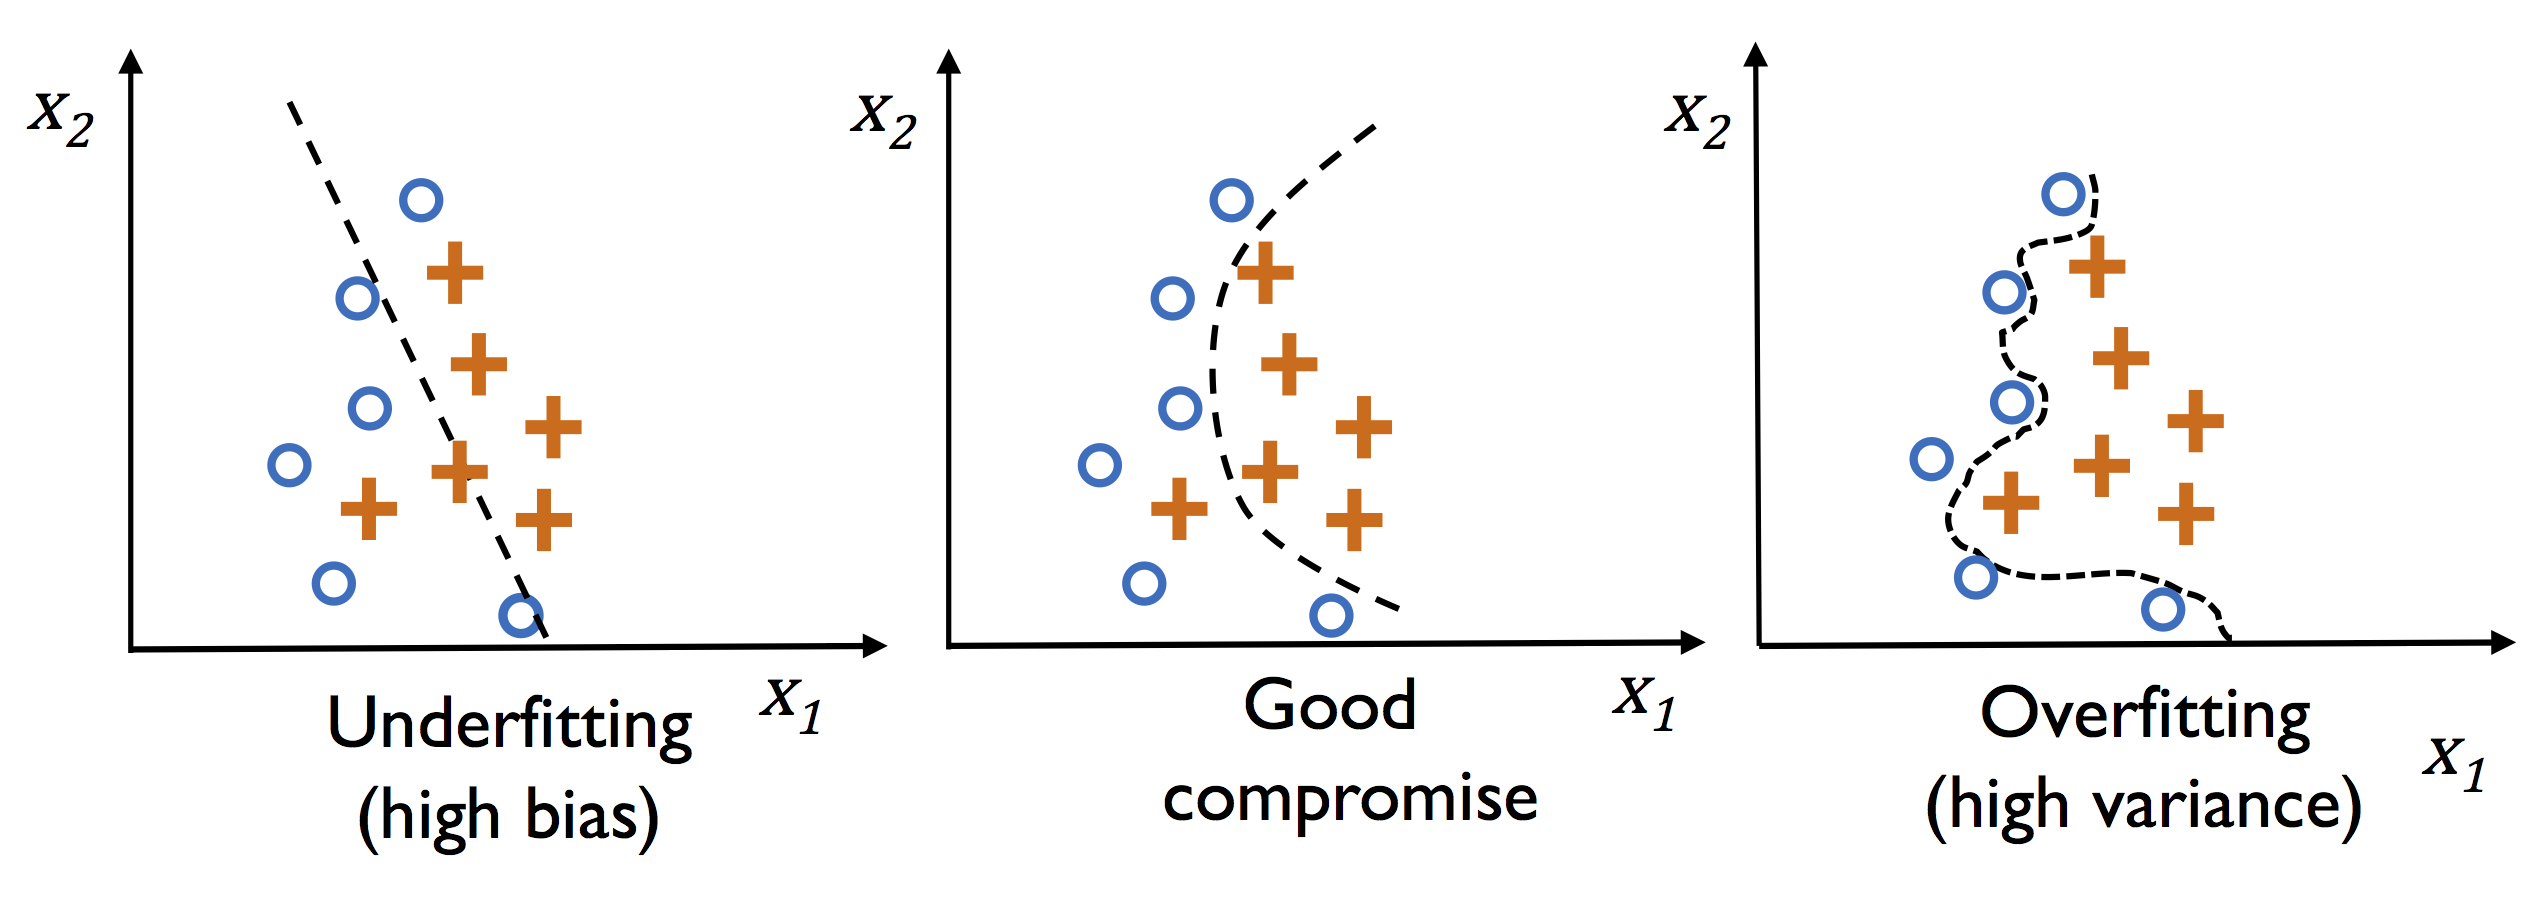

In [154]:
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Age_category,Family_size
1,1,1,female,38.0,1,0,71.2833,C,Young,1
3,1,1,female,35.0,1,0,53.1000,S,Young,1
4,0,3,male,35.0,0,0,8.0500,S,Young,0
5,0,3,male,28.0,0,0,8.4583,Q,Young,0
6,0,1,male,54.0,0,0,51.8625,S,Middle-aged,0


In [155]:
df.corr(numeric_only=True)

,Survived,Pclass,Age,SibSp,Parch,Fare,Family_size
Survived,1.000000,-0.339612,-0.065139,-0.034315,0.082007,0.257951,0.017514
Pclass,-0.339612,1.000000,-0.339467,0.083204,0.019344,-0.549152,0.066527
Age,-0.065139,-0.339467,1.000000,-0.233264,-0.173002,0.096274,-0.245842
SibSp,-0.034315,0.083204,-0.233264,1.000000,0.415016,0.159716,0.890750
Parch,0.082007,0.019344,-0.173002,0.415016,1.000000,0.215811,0.783181
Fare,0.257951,-0.549152,0.096274,0.159716,0.215811,1.000000,0.216962
Family_size,0.017514,0.066527,-0.245842,0.890750,0.783181,0.216962,1.000000


<Axes: >

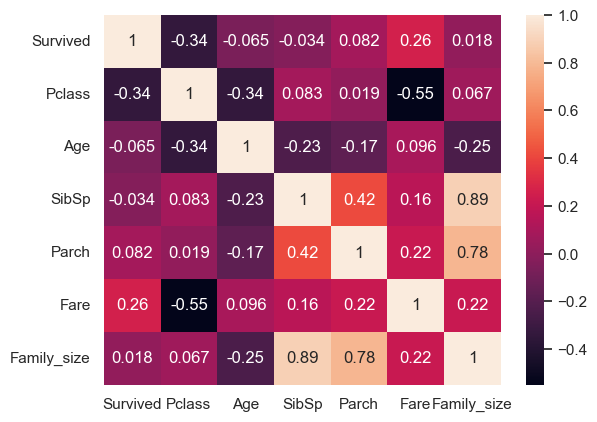

In [156]:
sns.heatmap(df.corr(numeric_only=True), annot=True)

In [157]:
corr_matrix = df.corr(numeric_only=True)
col_index_to_del = []

In [158]:
for i in range(1, corr_matrix.shape[0]):
    for j in range(1, i):
        if abs(round(corr_matrix.iloc[i][j], 2)) >= 0.9:
            if (i not in col_index_to_del) and (j not in col_index_to_del):
                if corr_matrix.iloc[i][0] >= corr_matrix.iloc[j][0]:
                    col_index_to_del.append(j)
                else:
                    col_index_to_del.append(i)

/var/folders/g_/hm4cms8109x15xyrjm2y3pfm0000gn/T/ipykernel_85119/3499372064.py:3: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  if abs(round(corr_matrix.iloc[i][j], 2)) >= 0.9:


In [159]:
len(col_index_to_del) # у нас нет признаков со взаимной корреляцией больше 0.9, поэтому 0

0

In [160]:
df.drop(df.columns[col_index_to_del], axis=1, inplace=True)
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Age_category,Family_size
1,1,1,female,38.0,1,0,71.2833,C,Young,1
3,1,1,female,35.0,1,0,53.1000,S,Young,1
4,0,3,male,35.0,0,0,8.0500,S,Young,0
5,0,3,male,28.0,0,0,8.4583,Q,Young,0
6,0,1,male,54.0,0,0,51.8625,S,Middle-aged,0


### На этом, к сожалению, все готовое заканчивается, поэтому дальше надо делать самому

In [161]:
df_end_copy = df.copy()

In [162]:
df = df_end_copy.copy()

In [163]:
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Age_category,Family_size
1,1,1,female,38.0,1,0,71.2833,C,Young,1
3,1,1,female,35.0,1,0,53.1000,S,Young,1
4,0,3,male,35.0,0,0,8.0500,S,Young,0
5,0,3,male,28.0,0,0,8.4583,Q,Young,0
6,0,1,male,54.0,0,0,51.8625,S,Middle-aged,0


## Приведение категориальных признаков к числовым 

In [164]:
age_map = {
    'Child': 0,
    'Young': 1,
    'Middle-aged': 2,
    'Old': 3
}

df['Age_category'] = df['Age_category'].map(age_map)

In [165]:
df = df.drop('Age', axis = 1)

In [166]:
df.head()

,Survived,Pclass,Sex,SibSp,Parch,Fare,Embarked,Age_category,Family_size
1,1,1,female,1,0,71.2833,C,1,1
3,1,1,female,1,0,53.1000,S,1,1
4,0,3,male,0,0,8.0500,S,1,0
5,0,3,male,0,0,8.4583,Q,1,0
6,0,1,male,0,0,51.8625,S,2,0


In [167]:
sex_map = {'male': 0, 'female': 1}

df['Sex'] = df['Sex'].map(sex_map)

In [168]:
df.head()

,Survived,Pclass,Sex,SibSp,Parch,Fare,Embarked,Age_category,Family_size
1,1,1,1,1,0,71.2833,C,1,1
3,1,1,1,1,0,53.1000,S,1,1
4,0,3,0,0,0,8.0500,S,1,0
5,0,3,0,0,0,8.4583,Q,1,0
6,0,1,0,0,0,51.8625,S,2,0


In [169]:
most_frequent = df['Embarked'].mode()[0]  # Находим моду
df['Embarked'] = df['Embarked'].fillna(most_frequent) # Заполняем пропуски модой (2 пропуска)

In [170]:
embarked_map = {'S': 0, 'C': 1, 'Q': 2}

df['Embarked'] = df['Embarked'].map(embarked_map)

In [171]:
df.head()

,Survived,Pclass,Sex,SibSp,Parch,Fare,Embarked,Age_category,Family_size
1,1,1,1,1,0,71.2833,1,1,1
3,1,1,1,1,0,53.1000,0,1,1
4,0,3,0,0,0,8.0500,0,1,0
5,0,3,0,0,0,8.4583,2,1,0
6,0,1,0,0,0,51.8625,0,2,0


In [172]:
import numpy as np

conditions = [
    df['Fare'] <= 17,
    (df['Fare'] > 17) & (df['Fare'] <= 30),
    (df['Fare'] > 30) & (df['Fare'] <= 100),
    df['Fare'] > 100
]

tags = [0, 1, 2, 3]

df['Fare'] = np.select(conditions, tags)

In [173]:
df.head()

,Survived,Pclass,Sex,SibSp,Parch,Fare,Embarked,Age_category,Family_size
1,1,1,1,1,0,2,1,1,1
3,1,1,1,1,0,2,0,1,1
4,0,3,0,0,0,0,0,1,0
5,0,3,0,0,0,0,2,1,0
6,0,1,0,0,0,2,0,2,0


In [174]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 889 entries, 1 to 890
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype
---  ------        --------------  -----
 0   Survived      889 non-null    int64
 1   Pclass        889 non-null    int64
 2   Sex           889 non-null    int64
 3   SibSp         889 non-null    int64
 4   Parch         889 non-null    int64
 5   Fare          889 non-null    int64
 6   Embarked      889 non-null    int64
 7   Age_category  889 non-null    int64
 8   Family_size   889 non-null    int64
dtypes: int64(9)
memory usage: 69.5 KB


In [175]:
df_end_copy = df.copy()

## Разделение на обучающую и тестовую выборки и нормализация 'Иксов'

In [176]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

# Разделение на признаки и целевую переменную
X = df.iloc[:, 1:]
y = df.iloc[:, 0]

# Нормализация признаков
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

# Разделение на обучающую и тестовую выборки
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

## Обучение моделей

### Импорт библиотек и определение функций для оценки моделей

In [177]:
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, recall_score, f1_score, roc_auc_score, roc_curve
from sklearn.metrics import confusion_matrix

In [178]:
# Предсказание на тестовых данных

def predict_model(model, X_test):
    """
    Предсказывает метки и вероятности для тестового набора данных с помощью обученной модели.
    
    Параметры:
    model : обученная модель, поддерживающая методы predict и predict_proba
    X_test : тестовые данные

    Возвращает:
    y_pred : предсказанные метки
    y_proba : предсказанные вероятности для положительного класса
    """
    y_pred = model.predict(X_test)
    y_proba = model.predict_proba(X_test)[:, 1]
    return y_pred, y_proba

In [179]:
# Вычисление и вывод метрик

def evaluate_metrics(y_test, y_pred, y_proba):
    """
    Вычисляет и выводит метрики модели: Accuracy, Recall, F1-мера и AUC.

    Параметры:
    y_test : истинные метки тестовых данных
    y_pred : предсказанные метки
    y_proba : предсказанные вероятности для положительного класса
    """
    acc = accuracy_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    auc = roc_auc_score(y_test, y_proba)

    print(f"Accuracy: {acc:.4f}")
    print(f"Recall: {recall:.4f}")
    print(f"F1-мера: {f1:.4f}")
    print(f"AUC: {auc:.4f}")

In [ ]:
# Построение ROC-кривой

def plot_roc_curve(y_test, y_proba):
    """
    Строит ROC-кривую для модели.

    Параметры:
    y_test : истинные метки тестовых данных
    y_proba : предсказанные вероятности для положительного класса
    """
    fpr, tpr, _ = roc_curve(y_test, y_proba)
    auc = roc_auc_score(y_test, y_proba)

    plt.figure(figsize=(8, 6))
    plt.plot(fpr, tpr, label = f'ROC-кривая (AUC = {auc:.4f})')
    plt.plot([0, 1], [0, 1], linestyle = '--', color = 'grey')
    plt.xlabel('False Positive Rate (FPR)')
    plt.ylabel('True Positive Rate (TPR)')
    plt.title('ROC-кривая')
    plt.legend()
    plt.grid(True)
    plt.show()

In [ ]:
# Построение матрицы ошибок

def plot_confusion_matrix(y_test, y_pred):
    """
    Строит матрицу ошибок.
    
    Параметры:
    y_test : истинные метки тестовых данных
    y_pred : предсказанные вероятности для положительного класса
    """
    cm = confusion_matrix(y_test, y_pred)
    print("Матрица ошибок:")
    print(cm)
    
    #Подпись к осям
    class_labels = ['Not survived', 'Survived']

    plt.figure(figsize = (8, 6))
    sns.heatmap(cm, annot = True, fmt = 'd', cmap = 'Blues', xticklabels = class_labels, yticklabels = class_labels)
    plt.xlabel('Предсказанные метки')
    plt.ylabel('Истинные метки')
    plt.title('Матрица ошибок')
    plt.show()

## 1. Логистическая регрессия

Accuracy: 0.8202
Recall: 0.7077
F1-мера: 0.7419
AUC: 0.8587


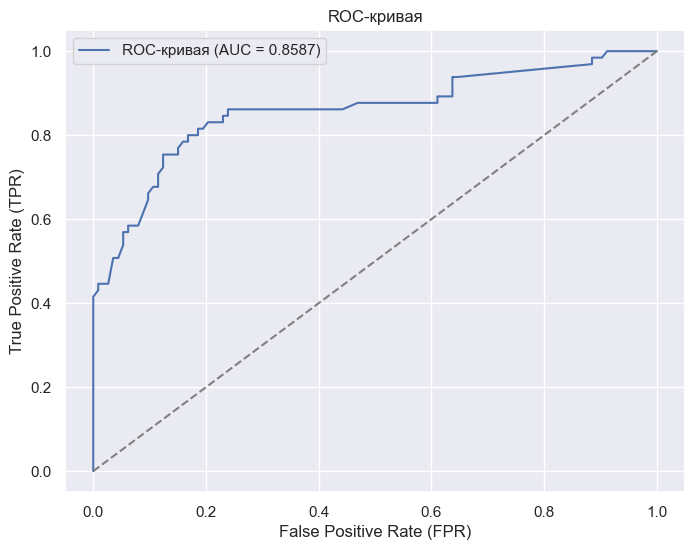

In [182]:
from sklearn.linear_model import LogisticRegression

# Обучение модели
model = LogisticRegression(
    random_state = 42,  # Для воспроизводимости
    max_iter = 1000
)
model.fit(X_train, y_train)

# Предсказание на тестовых данных
y_pred, y_proba = predict_model(model, X_test)

# Вычисление и вывод метрик
evaluate_metrics(y_test, y_pred, y_proba)

# Построение ROC-кривой
plot_roc_curve(y_test, y_proba)

## 2. k-ближайших соседей (k-NN)

Accuracy: 0.7809
Recall: 0.6308
F1-мера: 0.6777
AUC: 0.8145


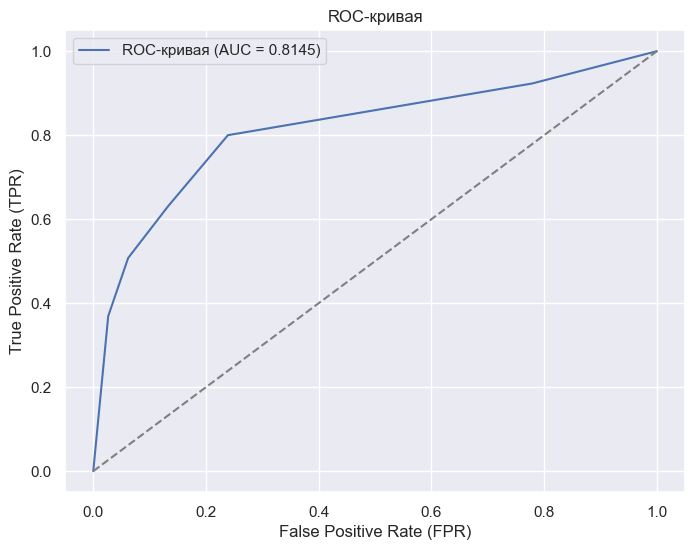

In [183]:
from sklearn.neighbors import KNeighborsClassifier

# Обучение модели
model = KNeighborsClassifier(n_neighbors = 5)  # По умолчанию 5 соседей
model.fit(X_train, y_train)

# Предсказание на тестовых данных
y_pred, y_proba = predict_model(model, X_test)

# Вычисление и вывод метрик
evaluate_metrics(y_test, y_pred, y_proba)

# Построение ROC-кривой
plot_roc_curve(y_test, y_proba)

### Подбор параметров с помощью GridSearch:

In [ ]:
from sklearn.model_selection import GridSearchCV

model = KNeighborsClassifier()

# Сетка параметров
param_grid = {
    'n_neighbors': [1, 2, 5, 6, 9, 10, 13, 14],
    'weights': ['uniform', 'distance'],
    'metric': ['minkowski', 'euclidean', 'manhattan', 'chebyshev']
}

# Запуск GridSearchCV
grid_search = GridSearchCV(model, param_grid, 
                           cv = 5, # cross-validation (по умолчанию 5), на сколько частей разбивается выборка, чем больше, тем лучше, но по времени дольше
                           scoring = 'accuracy', 
                           n_jobs = -1 # использовать все ядра процессора
                           ) 

grid_search.fit(X_train, y_train)

print("Лучшие параметры для k-NN:", grid_search.best_params_)

Лучшие параметры для k-NN: {'metric': 'minkowski', 'n_neighbors': 13, 'weights': 'uniform'}


### Обучение модели с этими параметрами:

Accuracy: 0.8034
Recall: 0.6308
F1-мера: 0.7009
AUC: 0.8722


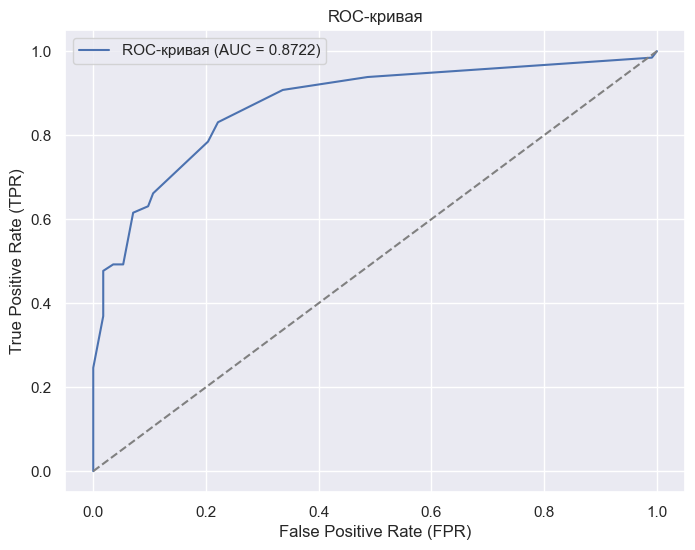

In [185]:
from sklearn.neighbors import KNeighborsClassifier

# Обучение модели
model = KNeighborsClassifier(**grid_search.best_params_)
model.fit(X_train, y_train)

# Предсказание на тестовых данных
y_pred, y_proba = predict_model(model, X_test)

# Вычисление и вывод метрик
evaluate_metrics(y_test, y_pred, y_proba)

# Построение ROC-кривой
plot_roc_curve(y_test, y_proba)

## 3. Случайный лес (Random Forest)

Accuracy: 0.8258
Recall: 0.6923
F1-мера: 0.7438
AUC: 0.8681


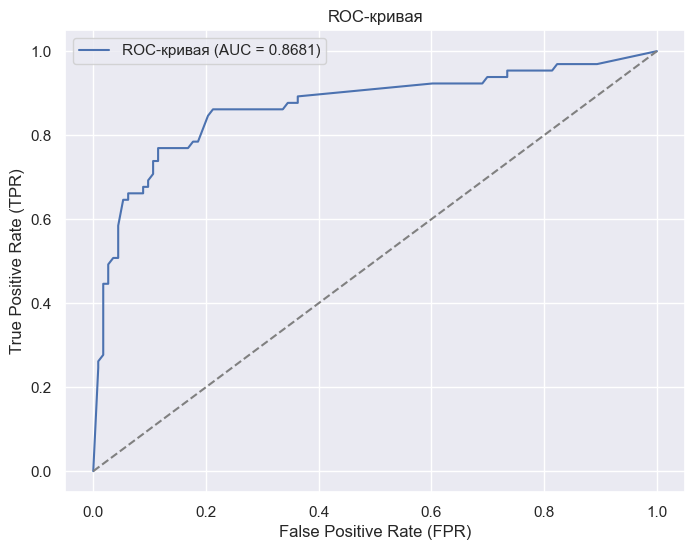

In [186]:
from sklearn.ensemble import RandomForestClassifier

# Обучение модели
model = RandomForestClassifier(
    n_estimators = 10,  # Количество деревьев
    random_state = 42,    # Для воспроизводимости
    max_depth = 10      # Максимальная глубина деревьев
)
model.fit(X_train, y_train)

# Предсказание на тестовых данных
y_pred, y_proba = predict_model(model, X_test)

# Вычисление и вывод метрик
evaluate_metrics(y_test, y_pred, y_proba)

# Построение ROC-кривой
plot_roc_curve(y_test, y_proba)

Accuracy: 0.8202
Recall: 0.7231
F1-мера: 0.7460
AUC: 0.8635


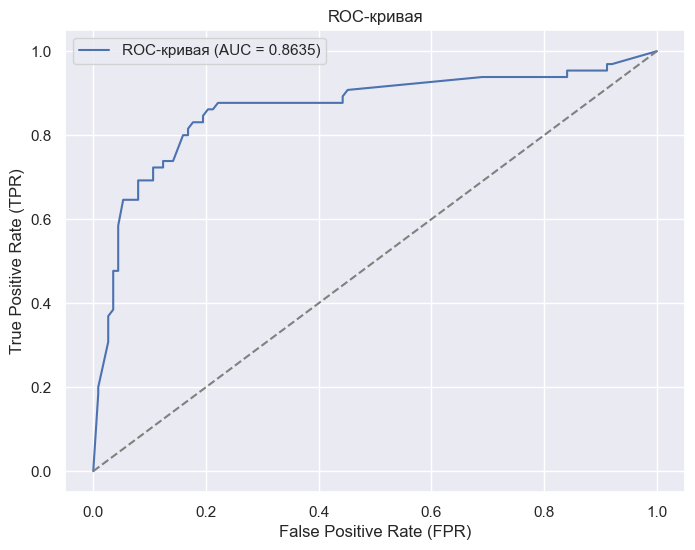

In [187]:
from sklearn.ensemble import RandomForestClassifier

# Обучение модели
model = RandomForestClassifier(
    n_estimators = 50,  # Количество деревьев
    random_state = 42,    # Для воспроизводимости
    max_depth = 50      # Максимальная глубина деревьев
)
model.fit(X_train, y_train)

# Предсказание на тестовых данных
y_pred, y_proba = predict_model(model, X_test)

# Вычисление и вывод метрик
evaluate_metrics(y_test, y_pred, y_proba)

# Построение ROC-кривой
plot_roc_curve(y_test, y_proba)

Accuracy: 0.8371
Recall: 0.7385
F1-мера: 0.7680
AUC: 0.8557


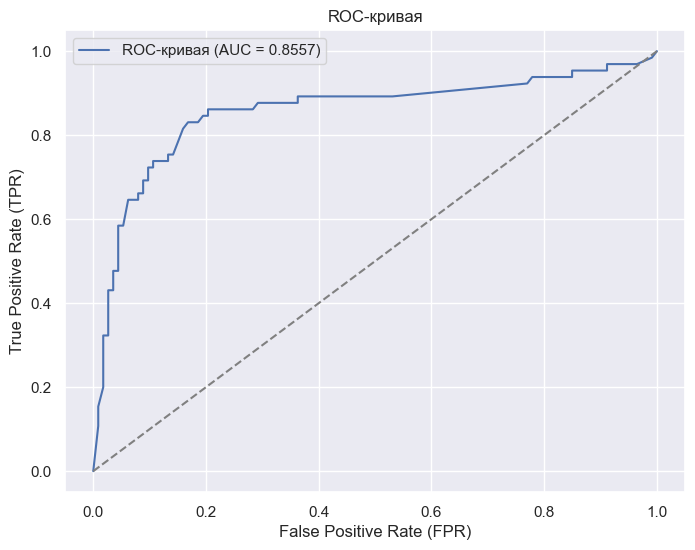

In [188]:
from sklearn.ensemble import RandomForestClassifier

# Обучение модели
model = RandomForestClassifier(
    n_estimators = 200,  # Количество деревьев
    random_state = 42,    # Для воспроизводимости
    max_depth = 20      # Максимальная глубина деревьев
)
model.fit(X_train, y_train)

# Предсказание на тестовых данных
y_pred, y_proba = predict_model(model, X_test)

# Вычисление и вывод метрик
evaluate_metrics(y_test, y_pred, y_proba)

# Построение ROC-кривой
plot_roc_curve(y_test, y_proba)

## 4. Метод опорных векторов (SVM)

Accuracy: 0.8146
Recall: 0.6154
F1-мера: 0.7080
AUC: 0.8579


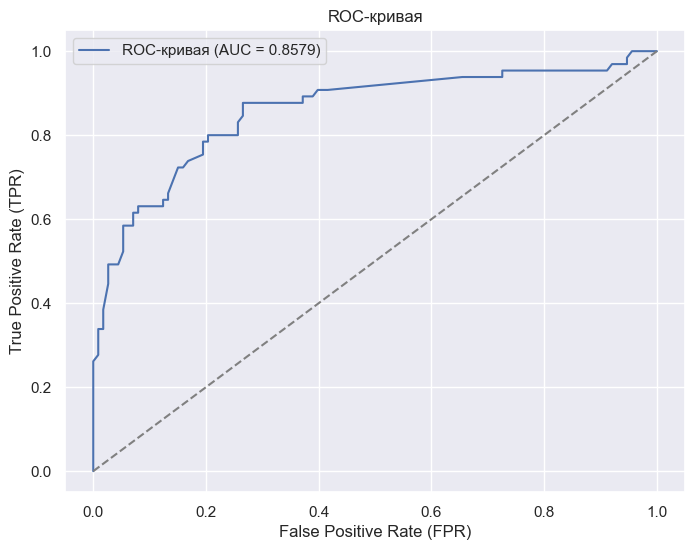

In [189]:
from sklearn.svm import SVC

# Обучение модели
model = SVC(
    kernel ='rbf',           # 'rbf' (по умолчанию), 'linear', 'poly', 'sigmoid'
    probability = True,      # Включаем расчет вероятностей для ROC-кривой
    random_state = 42,       # Для воспроизводимости
    C = 1.0                  # Параметр регуляризации
)
model.fit(X_train, y_train)

# Предсказание на тестовых данных
y_pred, y_proba = predict_model(model, X_test)

# Вычисление и вывод метрик
evaluate_metrics(y_test, y_pred, y_proba)

# Построение ROC-кривой
plot_roc_curve(y_test, y_proba)

## 5. Градиентный бустинг (Gradient Boost)

Accuracy: 0.8146
Recall: 0.7077
F1-мера: 0.7360
AUC: 0.8257


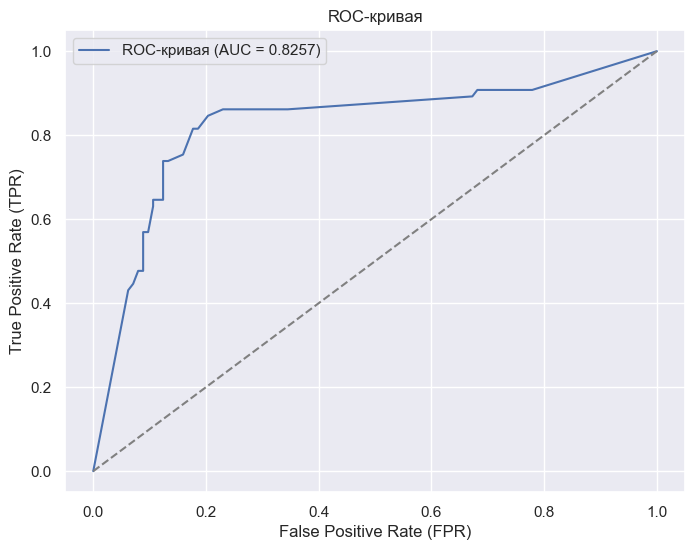

In [190]:
from sklearn.ensemble import GradientBoostingClassifier

# Обучение модели
model = GradientBoostingClassifier(
    random_state = 42,  # Для воспроизводимости
    n_estimators = 10,  # Количество деревьев
    learning_rate = 0.1,  # Скорость обучения
    max_depth = 10  # Максимальная глубина деревьев
)
model.fit(X_train, y_train)

# Предсказание на тестовых данных
y_pred, y_proba = predict_model(model, X_test)

# Вычисление и вывод метрик
evaluate_metrics(y_test, y_pred, y_proba)

# Построение ROC-кривой
plot_roc_curve(y_test, y_proba)

## 6. Дерево решений (Decision Tree)

Accuracy: 0.8034
Recall: 0.7077
F1-мера: 0.7244
AUC: 0.8110


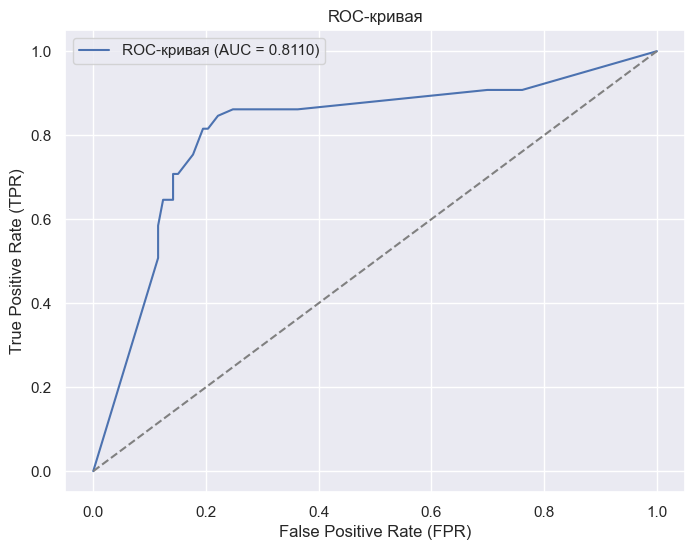

In [ ]:
from sklearn.tree import DecisionTreeClassifier

# Обучение модели
model = DecisionTreeClassifier(
    random_state = 42,  # Для воспроизводимости
    max_depth = 10,     # Максимальная глубина дерева
    min_samples_split = 2,  # Минимальное количество образцов для разделения узла
    min_samples_leaf = 1    # Минимальное количество образцов в листе
)
model.fit(X_train, y_train)

# Предсказание на тестовых данных
y_pred, y_proba = predict_model(model, X_test)

# Вычисление и вывод метрик
evaluate_metrics(y_test, y_pred, y_proba)

# Построение ROC-кривой
plot_roc_curve(y_test, y_proba)

## Построение матрицы ошибок для модели с наибольшей точностью

### Random Forest

Матрица ошибок:
[[101  12]
 [ 17  48]]


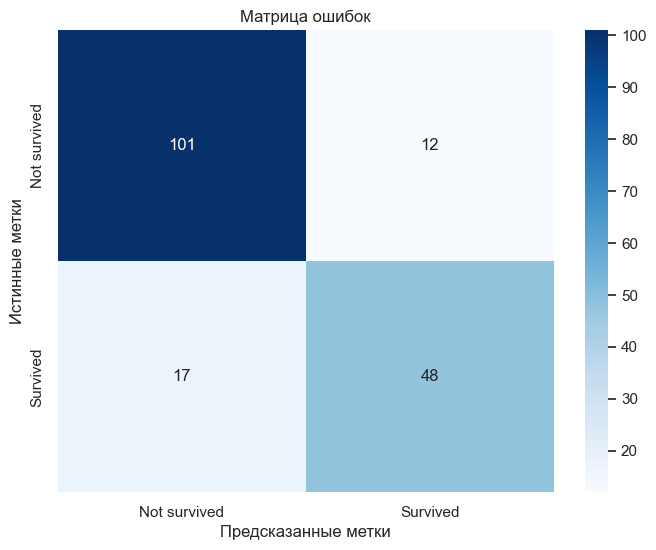

In [192]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix

# Обучение модели
model = RandomForestClassifier(
    n_estimators = 200,  # Количество деревьев
    random_state = 42,    # Для воспроизводимости
    max_depth = 20      # Максимальная глубина деревьев
)
model.fit(X_train, y_train)

# Предсказание на тестовых данных
y_pred, y_proba = predict_model(model, X_test)

# Построение матрицы ошибок
plot_confusion_matrix(y_test, y_pred)

### Отрисовка матрицы с помощью инструмента scikitplot

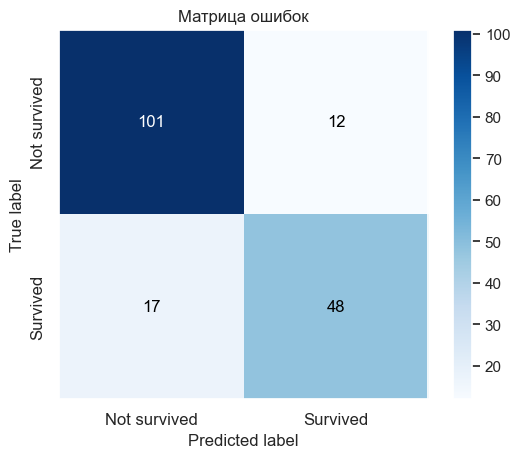

In [ ]:
import scikitplot as skplt

skplt.metrics.plot_confusion_matrix(y_test, y_pred)

#Подпись к осям
ax = plt.gca()
ax.set_xticklabels(['Not survived', 'Survived'])
ax.set_yticklabels(['Not survived', 'Survived'], rotation = 90, va = 'center')

plt.title('Матрица ошибок')
plt.show()